In [11]:
import os
import moviepy.editor as mp
import numpy as np
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.transform import warp, AffineTransform
from skimage.feature import canny
from skimage.color import rgb2gray
from skimage.io import imread

In [12]:
image_dir = '/Users/benjaminlucas/Projects/TimeLapse/StopMotion/EarthImages_Color1'
image_files = os.listdir(image_dir)
image_files = [f for f in image_files if f.split('.')[1] == 'JPG']
image_files = sorted(image_files, key=lambda x: int(x.split('.')[0].split('_')[1]))
image_files = [image_dir + os.path.sep + f for f in image_files]

In [14]:
clip = mp.ImageSequenceClip(image_files, fps=15)
clip_small = clip.resize(0.1)
clip_small.write_gif('earth_rotate.gif')
os.system('gifsicle -O3 --colors 8 earth_rotate.gif > earth_rotate_opt.gif')

t:   0%|          | 0/30 [00:00<?, ?it/s, now=None]

MoviePy - Building file earth_rotate.gif with imageio.


0

In [24]:
images = []
for f in image_files:
    im = imread(f)
    images.append(im)

In [25]:
im = images[0]
im_gray = rgb2gray(im)
edges = canny(im_gray, sigma=1)#, low_threshold=0.1, high_threshold=0.5)
imshow(edges)
plt.show()
# Detect two radii
hough_radii = np.arange(1100, 1300, 3)
hough_res = hough_circle(im_gray, hough_radii)

# Select the most prominent 3 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=1)



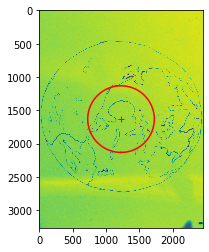

In [42]:
plt.imshow(im_gray)
plt.plot(cx, cy ,'r+')
theta = np.linspace(0,2*np.pi,100)
plt.plot([cx[0] + radii[0] * np.sin(th) for th in theta], [cy[0] + radii[0] * np.cos(th) for th in theta], 'r')
plt.show()

In [ ]:
translation = AffineTransform(scale=1, rotation=0, translation=(210, 50))
im_centered = warp(im, tform.inverse)


In [ ]:
tform = tf.SimilarityTransform(scale=1, rotation=math.pi/4,
                               translation=(text.shape[0]/2, -100))

rotated = tf.warp(text, tform)